In [9]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the data on student behavior
data = pd.read_csv("/content/Student_Behaviour.csv")

data.columns


Index(['Certification Course', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time', 'prefer to study in', 'salary expectation',
       'Do you like your degree?',
       'willingness to pursue a career based on their degree  ',
       'social medai & video', 'Travelling Time ', 'Stress Level ',
       'Financial Status', 'part-time job'],
      dtype='object')

In [10]:
data

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No
936,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
937,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
938,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No


In [45]:
data.iloc[931]

Certification Course                                                  Yes
Gender                                                             Female
Department                                                       Commerce
Height(CM)                                                          167.0
Weight(KG)                                                           65.0
10th Mark                                                            93.0
12th Mark                                                            85.0
college mark                                                         90.0
hobbies                                                     Reading books
daily studing time                                             1 - 2 Hour
prefer to study in                                                  Night
salary expectation                                                  15000
Do you like your degree?                                              Yes
willingness to pursue a career based o

In [11]:
# Select the features to use for clustering
X = data[['Gender', 'Department','10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time',
       'Do you like your degree?',
       'social medai & video', 'Travelling Time ', 'Stress Level ']]

In [12]:
X

,Gender,Department,10th Mark,12th Mark,college mark,hobbies,daily studing time,Do you like your degree?,social medai & video,Travelling Time,Stress Level
0,Male,BCA,79.0,65.0,80.0,Video Games,0 - 30 minute,No,1.30 - 2 hour,30 - 60 minutes,Bad
1,Female,BCA,70.0,80.0,70.0,Cinema,30 - 60 minute,Yes,1 - 1.30 hour,0 - 30 minutes,Bad
2,Male,BCA,69.5,61.0,55.0,Cinema,1 - 2 Hour,Yes,More than 2 hour,30 - 60 minutes,Awful
3,Female,BCA,70.0,59.0,58.0,Reading books,1 - 2 Hour,No,1.30 - 2 hour,0 - 30 minutes,Bad
4,Male,BCA,40.0,65.0,30.0,Video Games,30 - 60 minute,Yes,1.30 - 2 hour,30 - 60 minutes,Good
...,...,...,...,...,...,...,...,...,...,...,...
935,Male,B.com ISM,72.0,67.0,65.0,Video Games,30 - 60 minute,Yes,More than 2 hour,30 - 60 minutes,Bad
936,Male,B.com ISM,72.0,70.0,76.0,Cinema,2 - 3 hour,Yes,30 - 60 Minute,30 - 60 minutes,Good
937,Female,BCA,90.0,75.0,70.0,Cinema,30 - 60 minute,Yes,30 - 60 Minute,2.30 - 3 hour,Bad
938,Female,Commerce,85.0,74.0,75.0,Cinema,0 - 30 minute,Yes,More than 2 hour,2.30 - 3 hour,Awful


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the columns
for col in X.columns:
    # If the column consists of string values, transform it
    if X[col].dtype == 'object':
       X[col] = le.fit_transform(X[col])

<ipython-input-13-0fb43e1c929e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-13-0fb43e1c929e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-13-0fb43e1c929e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [14]:
#Perform dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [15]:
X_reduced

array([[-6.63325968e+00,  6.14101130e+00],
       [-2.70731956e-01,  5.95859871e-04],
       [ 1.87157111e+01, -2.59128279e+00],
       ...,
       [-8.95428587e+00, -1.13642412e+01],
       [-9.64904426e+00, -4.37358905e+00],
       [ 4.17907621e+01,  1.60788758e+01]])

In [16]:
#Fit the k-means model with the reduced data
kmeans = KMeans(n_clusters=5).fit(X_reduced)

#Predict the cluster labels for each data point
labels = kmeans.predict(X_reduced)

#Add the cluster labels to the data
data['cluster'] = labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


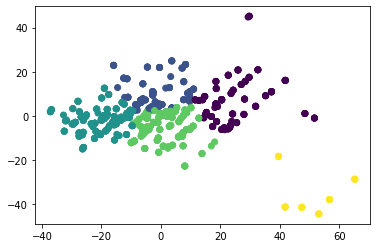

In [17]:
#Visualize the clusters by plotting the data points and coloring them according to the cluster label
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

In [18]:
data

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job,cluster
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No,1
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No,3
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No,0
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No,0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No,3
936,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No,1
937,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No,3
938,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No,2


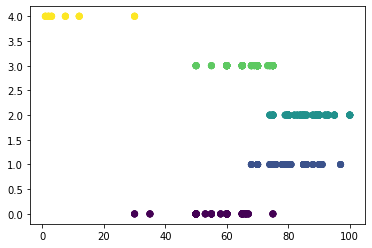

In [19]:
plt.scatter(data['college mark'], data['cluster'], c=labels)
plt.show()

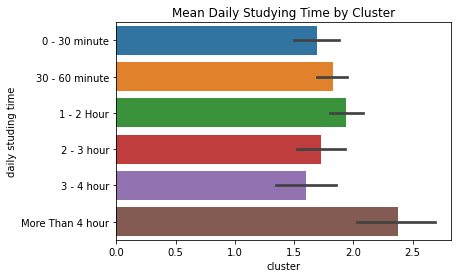

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute pairwise correlation of columns
corr = data.corr()

# Generate a barplot of the mean 'daily studing time' by cluster
sns.barplot(x=data['cluster'], y=data['daily studing time'])
plt.title('Mean Daily Studying Time by Cluster')
plt.show()

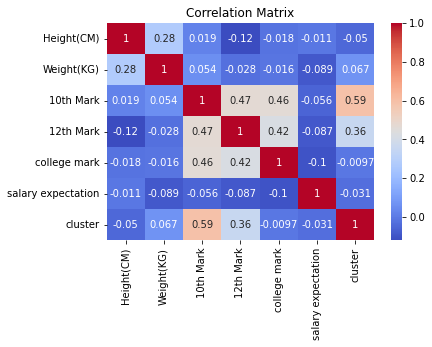

In [21]:
# Generate a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

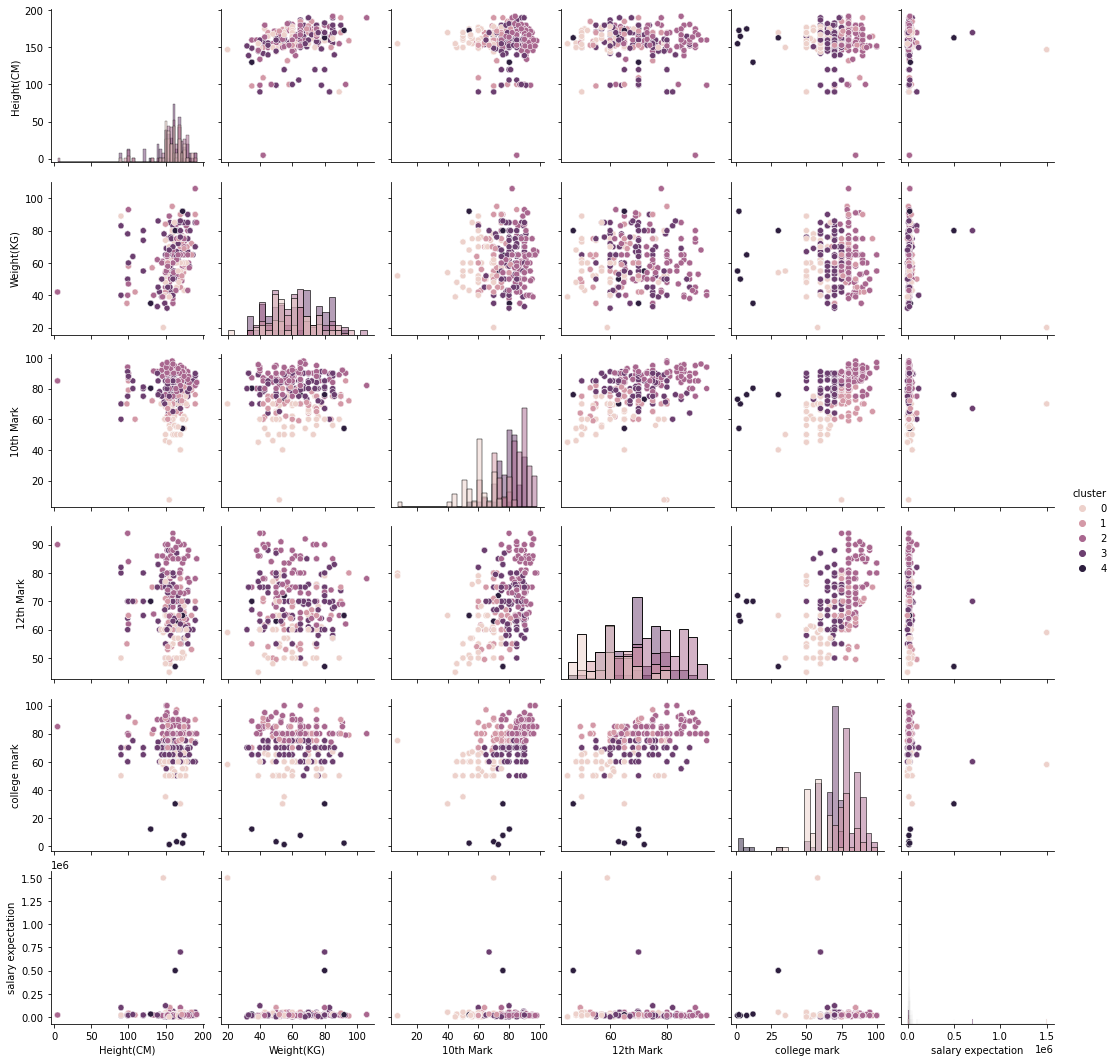

In [22]:
# Generate a pairplot of the input features
sns.pairplot(data, hue='cluster', diag_kind='hist')
plt.show()

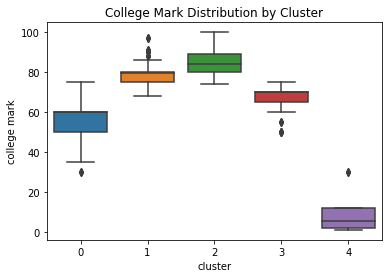

In [23]:
# Generate a boxplot of the 'college mark' feature
sns.boxplot(x='cluster', y='college mark', data=data)
plt.title('College Mark Distribution by Cluster')
plt.show()

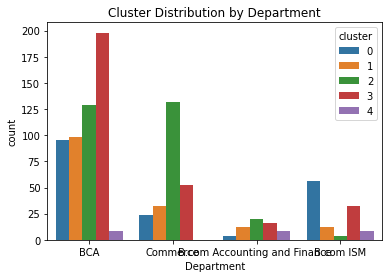

In [24]:
# Generate a countplot of the 'Department' feature
sns.countplot(x='Department', hue='cluster', data=data)
plt.title('Cluster Distribution by Department')
plt.show()

Enter gender (Male/Female): Male
Enter department: BCA
Enter 10th mark: 90
Enter 12th mark: 80
Enter college mark: 85
Enter hobbies (comma-separated): Cinema
Enter daily studying time (in hours): 2
Do you like your degree? (Yes/No): Yes
Enter social media and video time (in hours): 2
Enter travelling time (in minutes): 45
Enter stress level (out of 10): 5


In [3]:
import pandas as pd
import numpy as np

In [31]:
new_data = pd.read_csv("/content/New_Student_Behaviour.csv")

In [32]:
# Select the features to use for clustering
X_test = new_data[['Gender', 'Department','10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time',
       'Do you like your degree?',
       'social medai & video', 'Travelling Time ', 'Stress Level ']]

In [33]:
# Iterate over the columns
for col in X_test.columns:
    # If the column consists of string values, transform it
    if X_test[col].dtype == 'object':
       X_test[col] = le.fit_transform(X_test[col])

<ipython-input-33-76734c4bf944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = le.fit_transform(X_test[col])
<ipython-input-33-76734c4bf944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = le.fit_transform(X_test[col])
<ipython-input-33-76734c4bf944>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [34]:
#Perform dimensionality reduction using PCA
X_test_reduced = pca.transform(X_test)

#Predict the cluster labels for each data point in the test data
labels_test = kmeans.predict(X_test_reduced)

#Add the cluster labels to the test data
new_data['cluster'] = labels_test

print(new_data)

  Certification Course  Gender Department  Height(CM)  Weight(KG)  10th Mark  \
0                  Yes    Male        BCA         100          80       79.0   
1                  Yes  Female        BCA          90          40       75.0   
2                   No    Male        BCA         159          78       69.5   
3                   No  Female        BCA         147          20       70.0   
4                  Yes    Male        BCA         170          54       40.0   
5                   No  Female        BCA         139          33       90.0   
6                   No    Male        BCA         165          50       70.0   

   12th Mark  college mark        hobbies daily studing time  \
0         65            80         Cinema      0 - 30 minute   
1         80            70         Cinema     30 - 60 minute   
2         61            55    Video Games      0 - 30 minute   
3         59            58  Reading books      0 - 30 minute   
4         65            30    Video Gam

######OK

In [50]:
# Take user input for row index and columns to modify
row_index = int(input("Enter row index to modify: "))
cols_to_modify = input("Enter column names to modify (separated by commas): ").split(',')

# Display current data for the selected row
print("\nCurrent data:")
print(data.loc[row_index])

Enter row index to modify: 931
Enter column names to modify (separated by commas): daily studing time,social medai & video,Travelling Time

Current data:
Certification Course                                                  Yes
Gender                                                             Female
Department                                                       Commerce
Height(CM)                                                          167.0
Weight(KG)                                                           65.0
10th Mark                                                            93.0
12th Mark                                                            85.0
college mark                                                         90.0
hobbies                                                     Reading books
daily studing time                                             1 - 2 Hour
prefer to study in                                                  Night
salary expectation              

In [51]:
# Modify the selected columns for the selected row
for col in cols_to_modify:
    new_val = input(f"Enter new value for {col}: ")
    data.at[row_index, col] = new_val

Enter new value for daily studing time: 3-4 hour
Enter new value for social medai & video: 1.30-2 hour
Enter new value for Travelling Time: 2-2.30 hour


In [52]:
# Encode the categorical columns using LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])


In [53]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(data.drop('cluster', axis=1))

In [54]:
# Fit the k-means model with the reduced data
kmeans = KMeans(n_clusters=5).fit(X_reduced)

# Predict the cluster labels for each data point
labels = kmeans.predict(X_reduced)

# Add the cluster labels to the data
data['cluster'] = labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
# Print the cluster label for the modified row
print("\nCluster label for modified row:")
print(data.loc[row_index, 'cluster'])


Cluster label for modified row:
0
